# [IAPR 2019:][iapr2019] Lab 2 ‒  Object description

**Author:** Luca Fetz & Mohammed-Ismail Ben Salah 
**Due date:** 19.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Description
In the `lab-02-data/` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

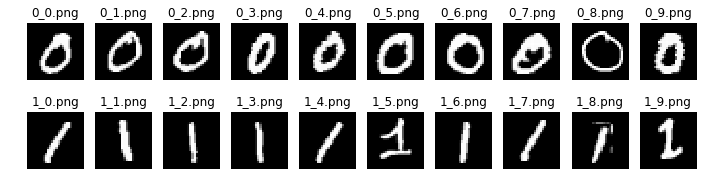

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion
look at slides 22 to 30 in lecture 4

good ideas:
binarize and apply fourier on every white point

use non maximum suppression/morphological skeleton and use fourier on the skeleton

less good ideas:
apply snake and apply fourier on contour

only keep frontier and apply fourier here

(10, 28, 28)


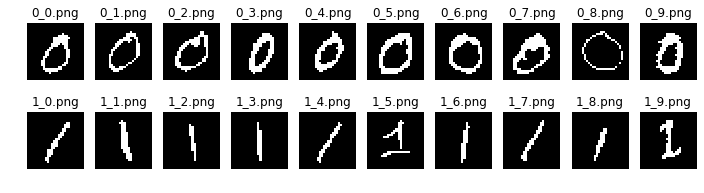

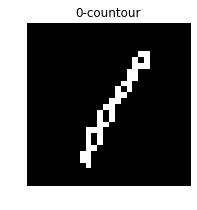

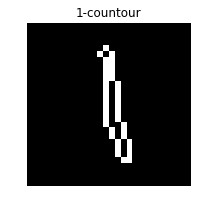

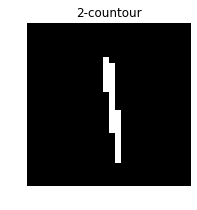

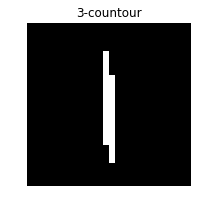

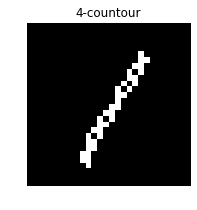

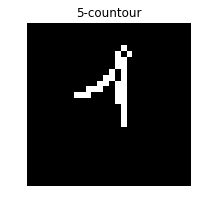

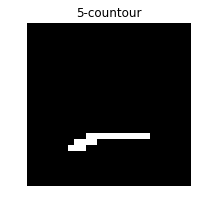

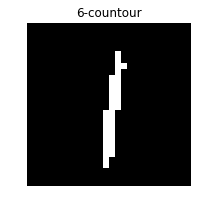

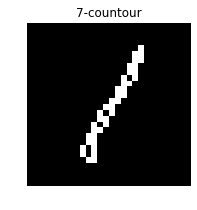

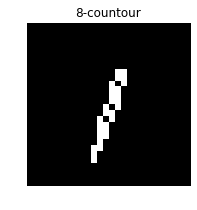

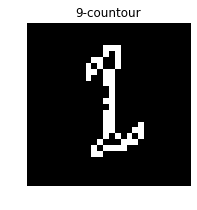

In [66]:
# u_k = x_k + j y_k

#fft(zeros_im[0]);

# Import stuff
import numpy as np
from skimage.filters import threshold_minimum
from scipy.fftpack import fft, ifft
from skimage.measure import find_contours
_
#extract number of images and number of pixels
print(zeros_im.shape)
N_images, dim,_ = zeros_im.shape

# Morphological stuff

#binarize images and count number of points to be in descriptor
zeros_im_bin = zeros_im.copy()
min_thres  = threshold_minimum(zeros_im_bin)
cust_thres = 230
zeros_im_bin = zeros_im_bin > cust_thres

ones_im_bin = ones_im.copy()
min_thres = threshold_minimum(ones_im_bin)
ones_im_bin = ones_im_bin > cust_thres
            
# Convert to uint8 
zeros_im_bin = zeros_im_bin * 255
ones_im_bin = ones_im_bin * 255

#visualize binarization
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im_bin, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im_bin, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
zeros_contours = []
ones_contours = []

# Find countours fo each image
for idx in range(0,N_images):
    # Find countours return multiples iso-v
    zero_countour = find_contours(zeros_im_bin[idx],128,fully_connected='high',positive_orientation='low')
    zeros_contours.append(zero_countour)
    one_countour = find_contours(ones_im_bin[idx],128,fully_connected='high',positive_orientation='low')
    ones_contours.append(one_countour)
    
def convert_countour_to_image(dim_img,countour):
    img_countour = np.zeros((dim_img,dim_img))
    np_countour = np.around(countour).astype(int) # Round the coordinates
    for coord_elem in np_countour:
        row = coord_elem[0]
        col = coord_elem[1]
        img_countour[row,col] = 255
    return img_countour

for idx in range(0,N_images):
    for countour in ones_contours[idx]:
        fig, ax = plt.subplots(1, figsize=(12, 3))
        ax.imshow(convert_countour_to_image(dim,countour), cmap='gray')
        ax.axis('off')
        ax.set_title('{}-countour'.format(idx))    
        

# Keep only the first contours of each image
zeros_unique_countours = []
for idx in range(0,N_images):
    zeros_unique_countours.append(zeros_contours[idx][0])
# Keep only the first contours of each image
ones_unique_countours = []
for idx in range(0,N_images):
        zeros_unique_countours.append(zeros_contours[idx][0])

In [30]:
test = zeros_im.copy()
print(test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  62  91 213 255
  228  91  12   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  70 230 253 253 253
  253 253 152   7   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 246 253 253 253 253
  253 253 253 106   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  21 247 253 25

### 1.3 Additional method(s)
Add your implementation and discussion